# PyGreentea Network Generator 

### Load the dependencies

In [1]:
%matplotlib inline

from __future__ import print_function
import h5py
import numpy as np
from numpy import float32, int32, uint8, dtype
import sys
import matplotlib.pyplot as plt


pygt_path = '../PyGreentea'
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), pygt_path))

import math

import PyGreentea as pygt

### Load the default network template

In [2]:
netconf = pygt.netgen.NetConf()

### Set the memory limits for the GPU

In [3]:
# We use cuDNN, so:
netconf.ignore_conv_buffer = True
# 4 GB total, ignore convolution buffer. Let's keep 0.5 GB for implementation dependent buffers.
netconf.mem_global_limit = 3.5 * 1024 * 1024 * 1024
# 4 GB convolution buffer limit
netconf.mem_buf_limit = 3.5 * 1024 * 1024 * 1024

### Explore possible network input/output shapes for the chosen settings

In [4]:
# We test memory usage for training
mode = pygt.netgen.caffe_pb2.TRAIN
# The minimum we're interested in
shape_min = [100,100,100]
# And maximum
shape_max = [200,200,200]
# We want Z and Y to be independent, but X == Y
constraints = [None, None, lambda x: x[1]]
# Compute (can be quite intensive)
inshape, outshape, fmaps = pygt.netgen.compute_valid_io_shapes(netconf,mode,shape_min,shape_max,constraints=constraints)

++++ Valid: [100] => [12]
-- Invalid: [101] => []
-- Invalid: [102] => []
-- Invalid: [103] => []
-- Invalid: [104] => []
-- Invalid: [105] => []
-- Invalid: [106] => []
-- Invalid: [107] => []
++++ Valid: [108] => [20]
-- Invalid: [109] => []
-- Invalid: [110] => []
-- Invalid: [111] => []
-- Invalid: [112] => []
-- Invalid: [113] => []
-- Invalid: [114] => []
-- Invalid: [115] => []
++++ Valid: [116] => [28]
-- Invalid: [117] => []
-- Invalid: [118] => []
-- Invalid: [119] => []
-- Invalid: [120] => []
-- Invalid: [121] => []
-- Invalid: [122] => []
-- Invalid: [123] => []
++++ Valid: [124] => [36]
-- Invalid: [125] => []
-- Invalid: [126] => []
-- Invalid: [127] => []
-- Invalid: [128] => []
-- Invalid: [129] => []
-- Invalid: [130] => []
-- Invalid: [131] => []
++++ Valid: [132] => [44]
-- Invalid: [133] => []
-- Invalid: [134] => []
-- Invalid: [135] => []
-- Invalid: [136] => []
-- Invalid: [137] => []
-- Invalid: [138] => []
-- Invalid: [139] => []
++++ Valid: [140] => [52]
-- I

### Visualization

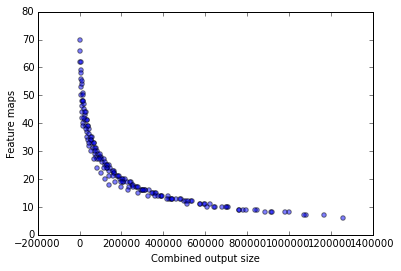

In [7]:
plt.figure()
# Combined output size versus feature map count
plt.scatter([x[0]*x[1]*x[2] for x in outshape], fmaps, alpha = 0.5)
plt.ylabel('Feature maps')
plt.xlabel('Combined output size')
plt.show()

### Pick parameters, actually generate and store the network

In [6]:
netconf.input_shape = inshape[78]
netconf.output_shape = outshape[78]
netconf.fmap_start = fmaps[78]

print ('Input shape: %s' % netconf.input_shape)
print ('Output shape: %s' % netconf.output_shape)
print ('Feature maps: %s' % netconf.fmap_start)

netconf.loss_function = "euclid"
train_net_conf_euclid, test_net_conf = pygt.netgen.create_nets(netconf)
netconf.loss_function = "malis"
train_net_conf_malis, test_net_conf = pygt.netgen.create_nets(netconf)

with open('net_train_euclid.prototxt', 'w') as f:
    print(train_net_conf_euclid, file=f)
with open('net_train_malis.prototxt', 'w') as f:
    print(train_net_conf_malis, file=f)
with open('net_test.prototxt', 'w') as f:
    print(test_net_conf, file=f)

Input shape: [100, 148, 148]
Output shape: [12, 60, 60]
Feature maps: 33
f: 1 w: [100, 148, 148] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 33 w: [98, 146, 146] d: [1, 1, 1]
WM: 3564
CM: 236563200
AM: 551487552
f: 33 w: [96, 144, 144] d: [1, 1, 1]
WM: 117612
CM: 7445081952
AM: 525533184
f: 33 w: [48, 72, 72] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 99 w: [46, 70, 70] d: [1, 1, 1]
WM: 352836
CM: 886837248
AM: 178516800
f: 99 w: [44, 68, 68] d: [1, 1, 1]
WM: 1058508
CM: 2409976800
AM: 161137152
f: 99 w: [22, 34, 34] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 297 w: [20, 32, 32] d: [1, 1, 1]
WM: 3175524
CM: 271918944
AM: 48660480
f: 297 w: [18, 30, 30] d: [1, 1, 1]
WM: 9526572
CM: 656916480
AM: 38491200
f: 297 w: [9, 15, 15] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 891 w: [7, 13, 13] d: [1, 1, 1]
WM: 28579716
CM: 64953900
AM: 8432424
f: 891 w: [5, 11, 11] d: [1, 1, 1]
WM: 85739148
CM: 113837724
AM: 4312440
f: 891 w: [10, 22, 22] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 297 w: [10, 22, 22] d: [1, 1, 1]
WM: 1058508
CM: 137998080